# 0. Setup

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()
apc.plotly.setup()

# 1. Heatmaps with Seaborn

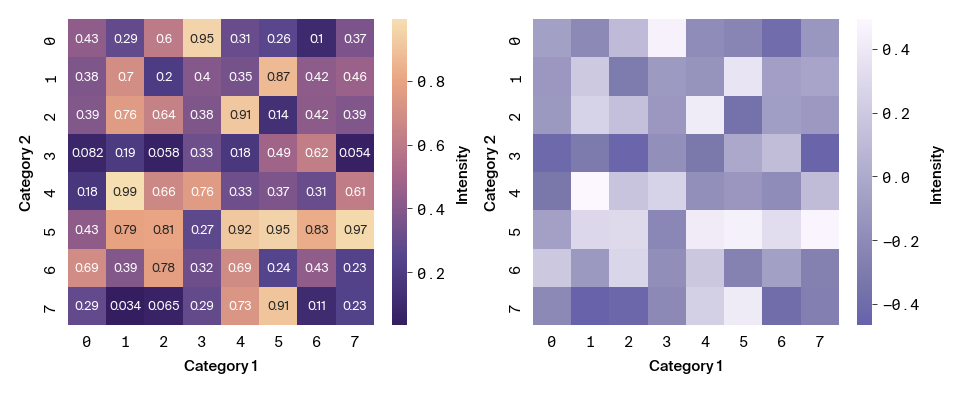

In [2]:
random_data = np.random.rand(8, 8)

fig, axs = plt.subplots(1, 2, figsize=(13, 5), layout="constrained")
sns.heatmap(
    random_data,
    ax=axs[0],  # type: ignore
    square=True,
    cmap="apc:magma",
    cbar_kws={"label": "Intensity"},
    annot=True,
    annot_kws={"fontsize": 12},
)
sns.heatmap(
    random_data - 0.5,
    ax=axs[1],  # type: ignore
    square=True,
    cmap="apc:purples",
    cbar_kws={"label": "Intensity"},
)

for ax in axs:  # type: ignore
    apc.mpl.style_plot(
        ax,
        categorical_axes="both",
        monospaced_axes="both",
        colorbar_exists=True,
    )
    ax.set_xlabel("Category 1")
    ax.set_ylabel("Category 2")

plt.show()

# 2. Heatmaps with Plotly

In [3]:
random_data = np.round(np.random.rand(8, 8), 2)

magma_colorscale = apc.gradients.magma.to_plotly_colorscale()
purples_colorscale = apc.gradients.purples.to_plotly_colorscale()

fig = make_subplots(1, 2, horizontal_spacing=0.25)
fig.add_trace(
    go.Heatmap(
        z=random_data,
        colorbar=dict(title="Intensity", x=0.4),
        showscale=True,
        text=random_data,
        texttemplate="%{text}",
        colorscale=magma_colorscale,
    ),
    1,
    1,
)
fig.add_trace(
    go.Heatmap(
        z=random_data - 0.5,
        colorscale=purples_colorscale,
        colorbar=dict(title="Intensity"),
    ),
    1,
    2,
)
fig.update_layout(width=860, height=360)

for i in [1, 2]:
    fig.update_xaxes(title_text="Category 1", row=1, col=i)
    fig.update_yaxes(title_text="Category 2", row=1, col=i)

apc.plotly.set_ticklabel_monospaced(fig)
apc.plotly.add_commas_to_axis_tick_labels(fig)

fig.show()